In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
cali = pd.read_csv('caliset.csv')

In [15]:
cali.head()

,t,Date,daily_new_cases,daily_dead,daily_recovered,Unnamed: 5,Unnamed: 6
0,-1,18-Mar,4207,475,1084,NaN,NaN
1,0,19-Mar,5322,427,415,NaN,NaN
2,1,20-Mar,5986,627,689,NaN,NaN
3,2,21-Mar,6557,793,943,NaN,NaN
4,3,22-Mar,5560,651,952,NaN,NaN


In [16]:
cali = cali.iloc[:,:-1]

In [17]:
cali = cali.iloc[:,:-1]

In [18]:
N_0 = 60500000
S_0 = 60457019
I_0 = 37852
R_0 = 5129

In [19]:
t_val = cali['t'].to_list()
i_e = cali['daily_new_cases'].to_list()
d_e = cali['daily_dead'].to_list()
r_e = cali['daily_recovered'].to_list()

In [24]:
beta_e =[0]
mu_e =[0]

In [21]:
#first I need to calculate the daily active cases column
I_e =[I_0]

In [22]:
for i in range(1, len(t_val)):
    I_e.append(I_e[i-1] + i_e[i]-d_e[i]-r_e[i])
    #infected + daily infected - daily dead - daily recovered

In [25]:
for i in range(1,len(t_val)):
    beta_e.append((i_e[i])/((I_e[i-1])*N_0))
    mu_e.append((d_e[i])/I_e[i-1])

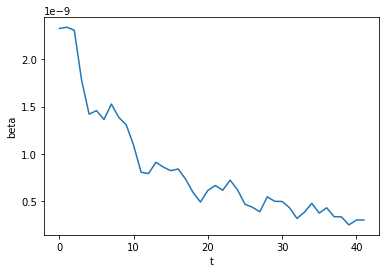

In [40]:
ax = sns.lineplot(x= t_val[1:], y = beta_e[1:])
ax.set(xlabel='t', ylabel='beta')
fig = ax.get_figure()
fig.savefig('beta.jpeg')

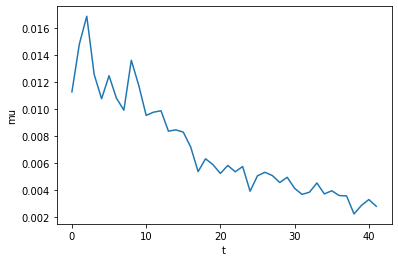

In [41]:
ax = sns.lineplot(x= t_val[1:], y = mu_e[1:])
ax.set(xlabel='t', ylabel='mu')
fig = ax.get_figure()
fig.savefig('mu.jpeg')

In [44]:
beta_0 = (5*(10**(-3)))/N_0
mu_0=(2.2*(10**(-4)))

In [72]:
beta_log_set = []
for i in range(1, len(beta_e)):
    beta_log_set.append(np.log(beta_e[i]-beta_0))

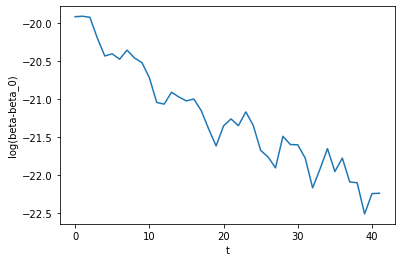

In [73]:
ax = sns.lineplot(x= t_val[1:], y = beta_log_set)
ax.set(xlabel='t', ylabel='log(beta-beta_0)')
fig = ax.get_figure()
fig.savefig('logbeta.jpeg')

In [74]:
np.polyfit(x=t_val[1:], y =beta_log_set, deg = 1)

array([ -0.05470739, -20.12874321])

In [75]:
test =[]
for i in range(0,len(beta_log_set)):
    test.append(-0.05470739*(t_val[i+1])-20.12874321)

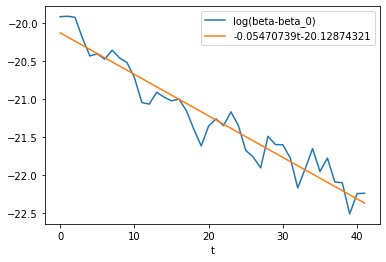

In [76]:
ax = sns.lineplot(x= t_val[1:], y = beta_log_set, label = 'log(beta-beta_0)')
ax = sns.lineplot(x=t_val[1:], y = test, label = '-0.05470739t-20.12874321')
ax.set(xlabel='t')
fig = ax.get_figure()
fig.savefig('logbetafitted.jpeg')

In [77]:
mu_log_set = []
for i in range(1, len(mu_e)):
    mu_log_set.append(np.log(mu_e[i]-mu_0))

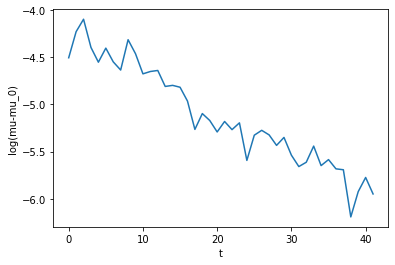

In [78]:
ax = sns.lineplot(x= t_val[1:], y = mu_log_set)
ax.set(xlabel='t', ylabel='log(mu-mu_0)')
fig = ax.get_figure()
fig.savefig('logmu.jpeg')

In [79]:
np.polyfit(x=t_val[1:], y =mu_log_set, deg = 1)

array([-0.0419096 , -4.25912928])

In [80]:
test2 =[]
for i in range(0,len(mu_log_set)):
    test2.append(-0.0419096*(t_val[i+1])-4.25912928)

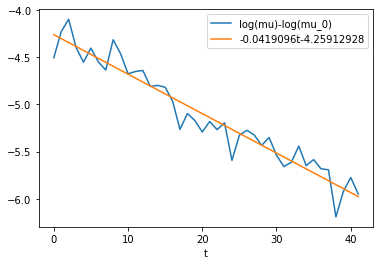

In [81]:
ax = sns.lineplot(x= t_val[1:], y = mu_log_set, label = 'log(mu)-log(mu_0)')
ax = sns.lineplot(x=t_val[1:], y = test2, label = '-0.0419096t-4.25912928')
ax.set(xlabel='t')
fig = ax.get_figure()
fig.savefig('logmufitted.jpeg')

In [162]:
a = -0.05470739
b= -20.12874321
c = -0.0419096
d = -4.25912928

In [83]:
test3 =[]
for i in range(1,len(beta_e)):
    test3.append(beta_0 + np.exp(a*t_val[i]+b))

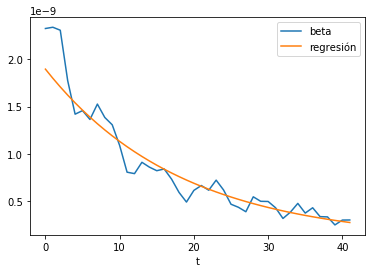

In [84]:
ax = sns.lineplot(x= t_val[1:], y = beta_e[1:], label = 'beta')
ax = sns.lineplot(x=t_val[1:], y = test3, label = 'regresión')
ax.set(xlabel='t')
fig = ax.get_figure()
fig.savefig('betafitted.jpeg')

In [85]:
test4 =[]
for i in range(1,len(mu_e)):
    test4.append(mu_0 + np.exp(c*t_val[i]+d))

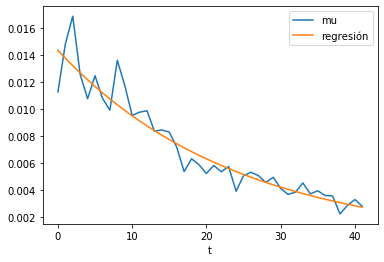

In [86]:
ax = sns.lineplot(x= t_val[1:], y = mu_e[1:], label = 'mu')
ax = sns.lineplot(x=t_val[1:], y = test4, label = 'regresión')
ax.set(xlabel='t')
fig = ax.get_figure()
fig.savefig('mufitted.jpeg')

In [89]:
gamma =[]
for i in range(0,len(i_e)):
    gamma.append((r_e[i])/I_e[i])

In [92]:
import statistics as s

In [457]:
g = s.mean(gamma[20:])

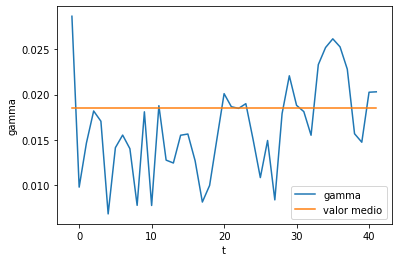

In [459]:
ax = sns.lineplot(x= t_val, y = gamma, label = 'gamma')
ax = sns.lineplot(x= t_val, y = [g]*43, label = 'valor medio')

ax.set(xlabel='t',ylabel ='gamma')
fig = ax.get_figure()
fig.savefig('gamma.jpeg')

20


In [99]:
import scipy

In [191]:
P = 0.00003075
L = 0.00000545
n=0.017214206321
j=0.727300217064
birth= 1.9*(10**(-5))
a = -0.05470739
b= -20.12874321
c = -0.0419096
d = -4.25912928
beta_0 = (5*(10**(-3)))/N_0
mu_0=(2.2*(10**(-4)))

In [283]:
print(birth)

1.9e-05


In [258]:
p=[beta_0,mu_0,a,b,c,d,g,P,L,n,j,birth]

In [193]:
def deathrate(t):
    P = 0.00003075
    L = 0.00000545
    n=0.017214206321
    j=0.727300217064
    return(P+L*np.cos((n*t)+j))

In [195]:
def beta(t):
    a = -0.05470739
    b= -20.12874321
    beta_0 = 8.264462809917356*(10**(-11))
    return(beta_0+np.exp(a*t+b))

In [196]:
def mu(t):
    mu_0=(2.2*(10**(-4)))
    c = -0.0419096
    d = -4.25912928
    return(mu_0 + np.exp(c*t+d))

In [304]:
def f(w,t,p):
    
    s,i,r,N=w
    beta_0,mu_0,a,b,c,d,g,P,L,n,j,birth=p
    f = [-s*i*beta(t)-deathrate(t)*s,
         s*i*beta(t)-g*i-deathrate(t)*i-mu(t)*i,
        g*i - deathrate(t)*r,
        -deathrate(t)*N - mu(t)*i]
    return f

In [107]:
from scipy.integrate import odeint

In [305]:
p=[beta_0,mu_0,a,b,c,d,g,P,L,n,j,b]
# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 150
numpoints = 150
#initial conditions
S_0 = 60457019
I_0 = 37852
R_0 = 5129

w0 = [S_0,I_0,R_0,N_0]
# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Call the ODE solver.
wsol = odeint(f, w0, t, args=(p,),
              atol=abserr, rtol=relerr)


In [306]:
S =wsol[:,0];
I = wsol[:,1];
R= wsol[:,2]
N= wsol[:,3]

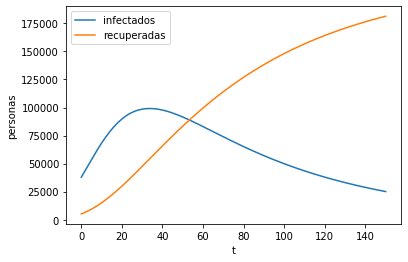

In [298]:
#ax = sns.lineplot(x= t, y = S, label = 'susceptibles')
ax = sns.lineplot(x= t, y = I, label = 'infectados')
ax = sns.lineplot(x= t, y = R, label = 'recuperadas')
#ax = sns.lineplot(x=t, y=N, label = 'poblacion')
ax.set(xlabel='t',ylabel ='personas')
fig = ax.get_figure()
fig.savefig('graph.jpeg')

In [308]:
C =[]
for i in range(0,len(t)):
    C.append(S[i]*I[i]*beta(t[i]))

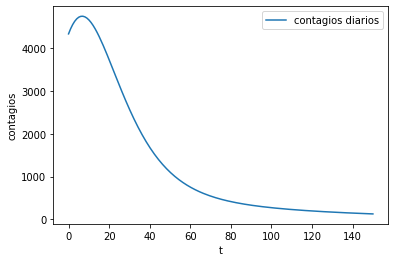

In [356]:
ax = sns.lineplot(x= t, y = C, label = 'contagios diarios')
ax.set(xlabel='t',ylabel ='contagios')
fig = ax.get_figure()
fig.savefig('dailycases.jpeg')

In [312]:
print(sum(C))

192300.8418642998


In [313]:
F =[]
for i in range(0,len(t)):
    F.append(mu(t[i])*I[i])

In [315]:
print(sum(F))

27260.46956754279


In [325]:
D =[]
for i in range(0,len(t)):
    D.append(deathrate(t[i])*N[i])
print(sum(D))

262525.79746515164


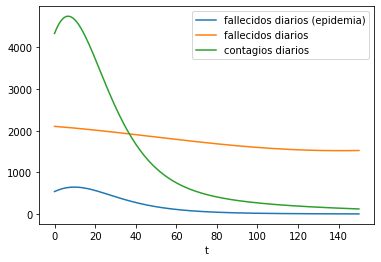

In [358]:
ax = sns.lineplot(x= t, y = F, label = 'fallecidos diarios (epidemia)')
ax = sns.lineplot(x= t, y = D, label = 'fallecidos diarios')
ax = sns.lineplot(x= t, y = C, label = 'contagios diarios')
ax.set(xlabel='t')
fig = ax.get_figure()
fig.savefig('comp.jpeg')

In [330]:
overalldeathratefromdisease = (sum(F)/sum(C))*100
print(overalldeathratefromdisease)

14.175949155115807


In [334]:
pop_var = np.var(N)
print(pop_var)

6742264208.212912


In [343]:
grad = (10*beta_0- beta(150))/30
intersect = 6*beta(150)-50*beta_0
print(grad)
print(intersect)
print(10*beta_0)

2.4776898872227628e-11
-3.6333955160092367e-09
8.264462809917356e-10


In [351]:
def beta2(t):
    m= 2.4776898872227628*((10)**(-11))
    c= -3.6333955160092367*((10)**(-9))
    s = 8.264462809917356*((10)**(-10))
    if t<150:
        return beta(t)
    elif t>=150 and t<=180:
        return m*t+c
    else:
        return s

In [346]:
grad = (2*mu_0- mu(150))/30
intersect = 6*mu(150)-10*mu_0
print(grad)
print(intersect)
print(2*mu_0)

6.45634018889265e-06
-0.0007221412340006773
0.00044000000000000007


In [350]:
def mu2(t):
    m= 6.45634018889265*((10)**(-6))
    c= -0.0007221412340006773
    s = 0.00044000000000000007
    if t<150:
        return mu(t)
    elif t>=150 and t<=180:
        return m*t+c
    else:
        return s

In [353]:
test5=[]
test6=[]
tval2=[]

for i in range(0,240):
    test5.append(beta2(i))
    test6.append(mu2(i))
    tval2.append(i)

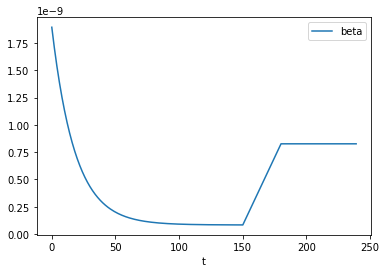

In [359]:
ax = sns.lineplot(x= tval2, y = test5, label = 'beta')
#ax = sns.lineplot(x= t, y = D, label = 'fallecidos diarios')
ax.set(xlabel='t')
fig = ax.get_figure()
fig.savefig('betanew.jpeg')

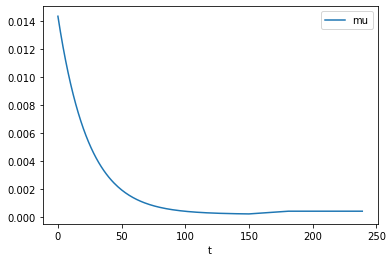

In [360]:
ax = sns.lineplot(x= tval2, y = test6, label = 'mu')
#ax = sns.lineplot(x= t, y = D, label = 'fallecidos diarios')
ax.set(xlabel='t')
fig = ax.get_figure()
fig.savefig('munew.jpeg')

In [361]:
def f2(w,t,p):
    
    s,i,r,N=w
    beta_0,mu_0,a,b,c,d,g,P,L,n,j,birth=p
    f = [-s*i*beta2(t)-deathrate(t)*s,
         s*i*beta2(t)-g*i-deathrate(t)*i-mu2(t)*i,
        g*i - deathrate(t)*r,
        -deathrate(t)*N - mu2(t)*i]
    return f

In [365]:
p=[beta_0,mu_0,a,b,c,d,g,P,L,n,j,b]
# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 240
numpoints = 240
#initial conditions
S_0 = 60457019
I_0 = 37852
R_0 = 5129

w0 = [S_0,I_0,R_0,N_0]
# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Call the ODE solver.
wsol = odeint(f2, w0, t, args=(p,),
              atol=abserr, rtol=relerr)


In [366]:
S =wsol[:,0];
I = wsol[:,1];
R= wsol[:,2]
N= wsol[:,3]

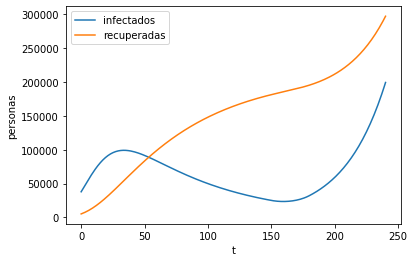

In [367]:
#ax = sns.lineplot(x= t, y = S, label = 'susceptibles')
ax = sns.lineplot(x= t, y = I, label = 'infectados')
ax = sns.lineplot(x= t, y = R, label = 'recuperadas')
#ax = sns.lineplot(x=t, y=N, label = 'poblacion')
ax.set(xlabel='t',ylabel ='personas')
fig = ax.get_figure()
fig.savefig('graphlong.jpeg')

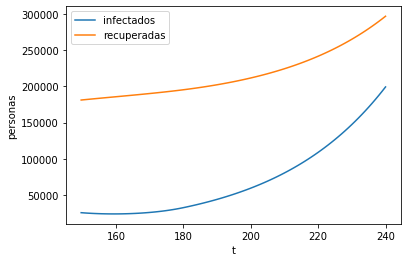

In [368]:
#ax = sns.lineplot(x= t, y = S, label = 'susceptibles')
ax = sns.lineplot(x= t[149:], y = I[149:], label = 'infectados')
ax = sns.lineplot(x= t[149:], y = R[149:], label = 'recuperadas')
#ax = sns.lineplot(x=t, y=N, label = 'poblacion')
ax.set(xlabel='t',ylabel ='personas')
fig = ax.get_figure()
fig.savefig('graphlongzoom.jpeg')

In [375]:
C =[]
for i in range(149,len(t)):
    C.append(S[i]*I[i]*beta2(t[i]))
print(sum(C))

297383.6521558905


In [477]:
len(t[149:])

0

In [476]:
ax = sns.lineplot(x= t[149:], y = C, label = 'contagios diarios')
ax = sns.lineplot(x= t[149:], y = [5000]*len(t[150:]))
ax.set(xlabel='t',ylabel ='contagios')
fig = ax.get_figure()
fig.savefig('dailycasessecondwave.jpeg')

ValueError: arrays must all be same length

In [382]:
for c in C:
    if c>=5000:
        print(C.index(c)+150)
        break
#day 218 cases break 5000

218


In [383]:
F =[]
for i in range(149,len(t)):
    F.append(mu2(t[i])*I[i])

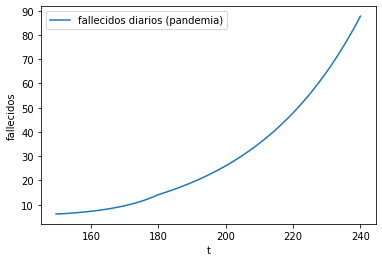

In [404]:
ax = sns.lineplot(x= t[149:], y = F, label = 'fallecidos diarios (pandemia)')
ax.set(xlabel='t',ylabel ='fallecidos')
fig = ax.get_figure()
fig.savefig('dailydeathssecondwave.jpeg')

In [387]:
for f in F:
    if f>=50:
        print(F.index(f)+150)
        break
#day 222 deaths break 50

222


In [388]:
C =[]
for i in range(0,len(t)):
    C.append(S[i]*I[i]*beta2(t[i]))

489990.57365601213


In [402]:
B =[]
for i in range(150,len(C)):
    fn =0
    for j in range(0,14):
        fn = fn+C[i-14+j]
    B.append((fn/N[i])*100000)
#incidence per 100,000
print(len(t[149:]))

91


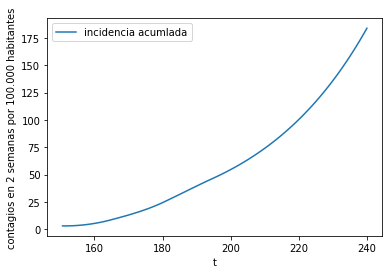

In [405]:
ax = sns.lineplot(x= t[150:], y = B, label = 'incidencia acumlada')
ax.set(xlabel='t',ylabel ='contagios en 2 semanas por 100.000 habitantes')
fig = ax.get_figure()
fig.savefig('incidence.jpeg')

In [406]:
for b in B:
    if b>=50:
        print(B.index(b)+150)
        break
#day 197 incidence break 50

197


In [408]:
for b in B:
    if b>=100:
        print(B.index(b)+150)
        break
#day 219 incidence break 100

219


In [414]:
print(sum(F[31:]))
#number of dead in final period

2454.2080953683994


In [418]:
print(sum(C[180:]))
#cases in final period

275342.32649730874


In [478]:
def f3(w,t,p):
    
    s,i,r,A,N=w
    birth,death,covdeath,rec,arec,b1,b2,b3,b4=p
    f3 = [-(s*i*b1)-(s*i*b2)-(s*A*b3)-(s*A*b4)+(birth*N)-(death*s),
         (s*i*b1)+(s*A*b3)-(rec*i)-(death*i)-(covdeath*i),
         (rec*i)+(arec*A)-(death*r),
        (s*i*b2)+(s*A*b4)-(arec*A)-(death*A),
        -(death*N)-(covdeath*i)+(birth*N)]
    return f3

In [479]:
#initial conditions
S_0 = 4.2*(10**7)
R_0 = 5*(10**6)
A_0 = 2.4*(10**5)
I_0 = 6*(10**4)
N_0 = S_0+A_0+I_0+R_0
birth = 2.1*(10**(-5))
death = 2.4*(10**(-5))
covdeath = 5*(10**(-4))
rec = 10**(-2)
arec = 7*(10**(-2))
b1 = (2*(10**(-2)))/N_0
b2 = (8*(10**(-2)))/N_0
b3 = (1*(10**(-2)))/N_0
b4 = (4*(10**(-2)))/N_0


p=[birth, death, covdeath,rec,arec,b1,b2,b3,b4]
# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 60
numpoints = 60

w0 = [S_0,I_0,R_0,A_0,N_0]
# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Call the ODE solver.
wsol = odeint(f3, w0, t, args=(p,),
              atol=abserr, rtol=relerr)


In [480]:
S =wsol[:,0];
I = wsol[:,1];
A= wsol[:,2]
R= wsol[:,3]
N= wsol[:,4]

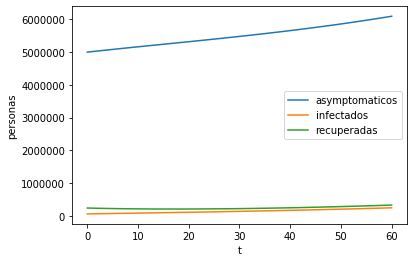

In [481]:
ax = sns.lineplot(x= t, y = A, label = 'asymptomaticos')
ax = sns.lineplot(x= t, y = I, label = 'infectados')
ax = sns.lineplot(x= t, y = R, label = 'recuperadas')
#ax = sns.lineplot(x=t, y=N, label = 'poblacion')
ax.set(xlabel='t',ylabel ='personas')
fig = ax.get_figure()
fig.savefig('newmodel.jpeg')

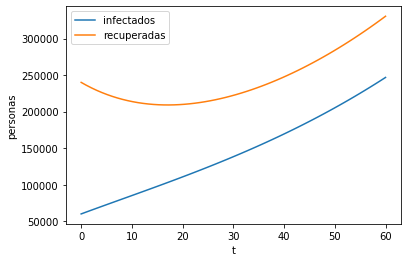

In [482]:
#ax = sns.lineplot(x= t, y = A, label = 'asymptomaticos')
ax = sns.lineplot(x= t, y = I, label = 'infectados')
ax = sns.lineplot(x= t, y = R, label = 'recuperadas')
#ax = sns.lineplot(x=t, y=N, label = 'poblacion')
ax.set(xlabel='t',ylabel ='personas')
fig = ax.get_figure()
fig = ax.get_figure()
fig.savefig('newmodel2.jpeg')

In [483]:
F =[]

for i in range(0,len(t)):
    F.append(death*I[i])

In [484]:
print(sum(F))

206.7692672953031


In [485]:
C =[]

for i in range(0,len(t)):
    C.append(b1*S[i]*I[i]+b3*S[i]*I[i])

In [486]:
print(sum(C))
#people who actually get sick

225416.59584390905


In [487]:
D =[]

for i in range(0,len(t)):
    D.append(b3*S[i]*I[i])

In [488]:
print(sum(D))
#infected by Asymp

75138.865281303


In [489]:
print((sum(D))/(sum(C))*100)
#percentage infected by Asymp

33.33333333333333


In [490]:
sum(F)/3
#estimate of dead who were infected by asymptomatic people

68.92308909843437

In [491]:
def f4(w,t,p):
    
    s,i,r,A,N=w
    birth,death,covdeath,rec,arec,b1,b2,b3,b4=p
    f4 = [-(s*i*b1)-(s*i*b2)-(s*A*b3)-(s*A*b4)+(birth*N)-(death*s),
         (s*i*b1)+(s*A*b3)-(rec*i)-(death*i)-(covdeath*i),
         (rec*i)+(arec*A)-(death*r),
        (s*i*b2)+(s*A*b4)-(arec*A)-(death*A),
        -(death*N)-(covdeath*i)+(birth*N)]
    return f4

In [492]:
#initial conditions
S_0 = 4.2*(10**7)
R_0 = 5*(10**6)
A_0 = 2.4*(10**5)
I_0 = 6*(10**4)
N_0 = S_0+A_0+I_0+R_0
birth = 2.1*(10**(-5))
death = 2.4*(10**(-5))
covdeath = 5*(10**(-4))
rec = 10**(-2)
arec = 7*(10**(-2))
b1 = (2*(10**(-2)))/(2*N_0)
b2 = (8*(10**(-2)))/(2*N_0)
b3 = (1*(10**(-2)))/(10*N_0)
b4 = (4*(10**(-2)))/(10*N_0)


p=[birth, death, covdeath,rec,arec,b1,b2,b3,b4]
# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 60
numpoints = 60

w0 = [S_0,I_0,R_0,A_0,N_0]
# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Call the ODE solver.
wsol = odeint(f4, w0, t, args=(p,),
              atol=abserr, rtol=relerr)


In [493]:
S =wsol[:,0];
I = wsol[:,1];
A= wsol[:,2]
R= wsol[:,3]
N= wsol[:,4]

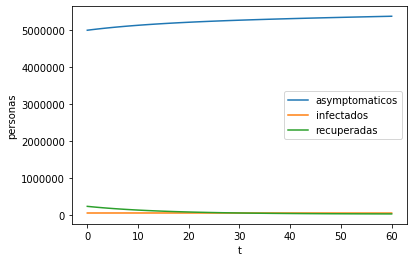

In [495]:
ax = sns.lineplot(x= t, y = A, label = 'asymptomaticos')
ax = sns.lineplot(x= t, y = I, label = 'infectados')
ax = sns.lineplot(x= t, y = R, label = 'recuperadas')
#ax = sns.lineplot(x=t, y=N, label = 'poblacion')
ax.set(xlabel='t',ylabel ='personas')
fig = ax.get_figure()
fig.savefig('newmodeltrack.jpeg')

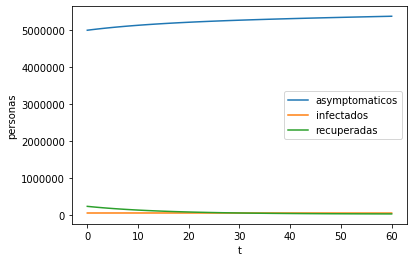

In [496]:
ax = sns.lineplot(x= t, y = A, label = 'asymptomaticos')
ax = sns.lineplot(x= t, y = I, label = 'infectados')
ax = sns.lineplot(x= t, y = R, label = 'recuperadas')
#ax = sns.lineplot(x=t, y=N, label = 'poblacion')
ax.set(xlabel='t',ylabel ='personas')
fig = ax.get_figure()
fig = ax.get_figure()
fig.savefig('newmodel2track.jpeg')

In [497]:
F =[]

for i in range(0,len(t)):
    F.append(death*I[i])

In [498]:
print(sum(F))

86.30713974444141


In [499]:
C =[]

for i in range(0,len(t)):
    C.append(b1*S[i]*I[i]+b3*S[i]*I[i])
print(sum(C)) #people who got sick

35045.780366496256


In [500]:
D =[]

for i in range(0,len(t)):
    D.append(b3*S[i]*I[i])
print(sum(D))
#infected by Asympt

3185.9800333178414


In [501]:
print((sum(D))/(sum(C))*100)
#percentage infected by Asymp

9.090909090909092


In [503]:
(9.09090909090909/100)*86.30713974444141
#people dead infected by asymp

7.846103613131037